In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

In [10]:
df = pd.read_csv('C:/Users/JinnyeongHeo/Desktop/2022-1/추천시스템/HeartDisease/archive (1)/heart_2020_cleaned.csv')

# 데이터 분석

# TSNE

In [11]:
import torch

In [12]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['HeartDisease']= label_encoder.fit_transform(df['HeartDisease'])
df['Smoking']= label_encoder.fit_transform(df['Smoking'])
df['AlcoholDrinking']= label_encoder.fit_transform(df['AlcoholDrinking'])
df['Stroke']= label_encoder.fit_transform(df['Stroke'])
df['DiffWalking']= label_encoder.fit_transform(df['DiffWalking'])
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['AgeCategory']= label_encoder.fit_transform(df['AgeCategory'])
df['Race']= label_encoder.fit_transform(df['Race'])
df['Diabetic']= label_encoder.fit_transform(df['Diabetic'])
df['PhysicalActivity']= label_encoder.fit_transform(df['PhysicalActivity'])
df['GenHealth']= label_encoder.fit_transform(df['GenHealth'])
df['Asthma']= label_encoder.fit_transform(df['Asthma'])
df['KidneyDisease']= label_encoder.fit_transform(df['KidneyDisease'])
df['SkinCancer']= label_encoder.fit_transform(df['SkinCancer'])

In [13]:
df = df[['HeartDisease','Stroke','DiffWalking','AgeCategory','PhysicalHealth','KidneyDisease','Smoking']]

In [14]:
df.set_index('HeartDisease',drop=True)

,Stroke,DiffWalking,AgeCategory,PhysicalHealth,KidneyDisease,Smoking
HeartDisease,,,,,,
0,0,0,7,3.0,0,1
0,1,0,12,0.0,0,0
0,0,0,9,20.0,0,1
0,0,0,11,0.0,0,0
0,0,1,4,28.0,0,0
...,...,...,...,...,...,...
1,0,1,8,7.0,0,1
0,0,0,3,0.0,0,1
0,0,0,5,0.0,0,0


In [15]:
from sklearn.manifold import TSNE

W = np.array(df)

model_tsne = TSNE(n_components=3,init='random')
W_embedded = model_tsne.fit(W)

In [16]:
print(W_embedded.embedding_.shape)

(319795, 3)


In [17]:
pd.DataFrame(W_embedded.embedding_)

,0,1,2
0,5.280326,-16.369982,6.273761
1,11.421026,7.282696,-11.262514
2,11.204293,-12.377488,-4.605124
3,-3.149455,-0.902369,12.480630
4,-16.170221,-1.184729,0.589075
...,...,...,...
319790,-9.018219,10.187283,5.278076
319791,7.726700,-7.506805,4.925693
319792,0.634527,-0.973786,-4.173800
319793,5.433946,-1.082636,9.224567


In [18]:
allList = df.iloc[:].index.values.tolist()

feature_with_embedding = df
feature_with_embedding['tsne1'] = pd.Series(W_embedded.embedding_[:, [0]].reshape(-1))
feature_with_embedding['tsne2'] = pd.Series(W_embedded.embedding_[:, [1]].reshape(-1))

In [19]:
feature_with_embedding

,HeartDisease,Stroke,DiffWalking,AgeCategory,PhysicalHealth,KidneyDisease,Smoking,tsne1,tsne2
0,0,0,0,7,3.0,0,1,5.280326,-16.369982
1,0,1,0,12,0.0,0,0,11.421026,7.282696
2,0,0,0,9,20.0,0,1,11.204293,-12.377488
3,0,0,0,11,0.0,0,0,-3.149455,-0.902369
4,0,0,1,4,28.0,0,0,-16.170221,-1.184729
...,...,...,...,...,...,...,...,...,...
319790,1,0,1,8,7.0,0,1,-9.018219,10.187283
319791,0,0,0,3,0.0,0,1,7.726700,-7.506805
319792,0,0,0,5,0.0,0,0,0.634527,-0.973786
319793,0,0,0,1,0.0,0,0,5.433946,-1.082636


In [20]:
feature_with_embedding_y = feature_with_embedding[feature_with_embedding['HeartDisease']== 1]
feature_with_embedding_n = feature_with_embedding[feature_with_embedding['HeartDisease']== 0]

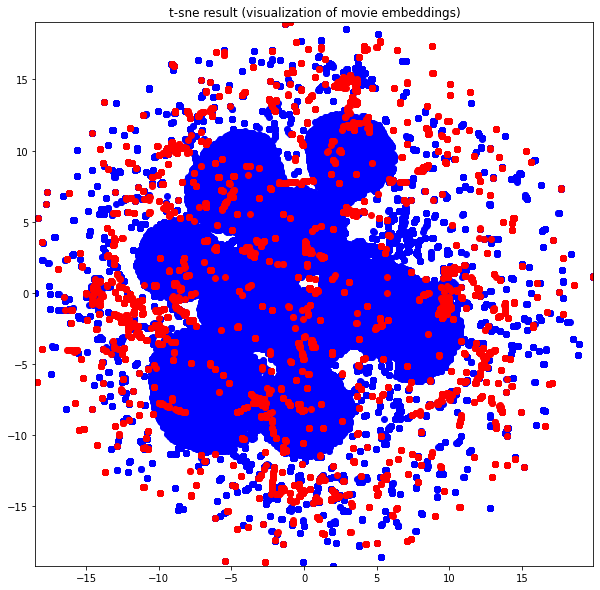

In [23]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.xlim(feature_with_embedding['tsne1'].min(), feature_with_embedding['tsne1'].max())
plt.ylim(feature_with_embedding['tsne2'].min(), feature_with_embedding['tsne2'].max())


plt.scatter(feature_with_embedding_n['tsne1'][:], feature_with_embedding_n['tsne2'][:], c='blue')
plt.scatter(feature_with_embedding_y['tsne1'][:], feature_with_embedding_y['tsne2'][:], c='red')



mplcursors.cursor(multiple=True).connect(
    "add", lambda sel: sel.annotation.set_text(
          feature_with_embedding['HeartDisease'][sel.target.index]
))


plt.title('t-sne result (visualization of movie embeddings)')
plt.show()